In [2]:
# Cell 1 — Load AirQualityUCI.xlsx and make a clean dataframe `df`

!pip -q install openpyxl pandas numpy

import pandas as pd, numpy as np

# 1) Upload the Excel file when prompted
from google.colab import files
uploaded = files.upload()  # choose AirQualityUCI.xlsx
fname = list(uploaded.keys())[0]

# 2) Read the sheet
xls = pd.ExcelFile(fname)
sheet = "AirQualityUCI" if "AirQualityUCI" in xls.sheet_names else xls.sheet_names[0]
raw = pd.read_excel(fname, sheet_name=sheet, engine="openpyxl")

# 3) Robust Date+Time → datetime
date_str = raw["Date"].astype(str).str.strip()
time_str = raw["Time"].astype(str).str.strip().str.replace(".", ":", regex=False)
is_24    = time_str.eq("24:00:00")
time_str = time_str.mask(is_24, "00:00:00")

date_parsed = pd.to_datetime(date_str, dayfirst=True, errors="coerce")
date_parsed = date_parsed.mask(is_24, date_parsed + pd.Timedelta(days=1))

dt = pd.to_datetime(date_parsed.dt.strftime("%Y-%m-%d") + " " + time_str, errors="coerce")
good = ~dt.isna()

# 4) Build df: set index, sort, and convert -200 → NaN
df = (raw.loc[good]
        .assign(datetime = dt[good])
        .drop(columns=["Date","Time"])
        .set_index("datetime")
        .sort_index()
        .replace(-200, np.nan))

# 5) Simple time helper (hour only)
df["hour"] = df.index.hour

print("Rows × Cols:", df.shape)
print("Date range:", df.index.min(), "→", df.index.max())
print("Columns:", list(df.columns))
df.head(3)


Saving AirQualityUCI.xlsx to AirQualityUCI.xlsx
Rows × Cols: (3597, 14)
Date range: 2004-01-04 00:00:00 → 2005-12-03 23:00:00
Columns: ['CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH', 'AH', 'hour']


,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,hour
datetime,,,,,,,,,,,,,,
2004-01-04 00:00:00,1.6,1143.00,106.0,6.291887,825.25,96.0,985.50,86.0,1477.25,978.25,11.950,61.624999,0.859344,0
2004-01-04 01:00:00,1.2,1043.75,100.0,5.121191,769.50,85.0,1031.25,70.0,1424.75,944.25,11.500,63.875000,0.865156,1
2004-01-04 02:00:00,1.1,1034.00,71.0,4.086652,715.50,50.0,1085.00,55.0,1405.00,891.25,10.675,67.224998,0.862988,2


In [3]:
df

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,hour
datetime,,,,,,,,,,,,,,
2004-01-04 00:00:00,1.6,1143.00,106.0,6.291887,825.25,96.0,985.50,86.0,1477.25,978.25,11.950,61.624999,0.859344,0
2004-01-04 01:00:00,1.2,1043.75,100.0,5.121191,769.50,85.0,1031.25,70.0,1424.75,944.25,11.500,63.875000,0.865156,1
2004-01-04 02:00:00,1.1,1034.00,71.0,4.086652,715.50,50.0,1085.00,55.0,1405.00,891.25,10.675,67.224998,0.862988,2
2004-01-04 03:00:00,0.9,956.25,72.0,4.045717,713.25,NaN,1098.50,NaN,1421.50,848.75,8.975,73.100000,0.839403,3
2004-01-04 04:00:00,0.7,909.25,44.0,2.433638,615.00,57.0,1237.00,49.0,1321.50,789.50,10.225,66.575000,0.829898,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2005-12-03 19:00:00,0.8,1176.75,NaN,7.480989,877.50,288.8,640.50,151.8,1223.50,844.00,13.950,47.825000,0.758215,19
2005-12-03 20:00:00,2.4,1382.50,NaN,14.073311,1119.00,549.6,522.00,201.3,1415.25,1310.00,13.200,51.350000,0.776017,20
2005-12-03 21:00:00,3.3,1362.75,NaN,12.411111,1063.75,679.4,536.25,221.0,1350.25,1353.25,11.975,56.074999,0.783215,21


In [ ]:
# Cell 2 — Column glossary + %missing + min/median/max

import numpy as np
import pandas as pd

# 2A) Human-friendly glossary for columns we actually have
desc_map = {
    "CO(GT)"        : ("ground_truth", "Carbon monoxide (reference analyzer)"),
    "NMHC(GT)"      : ("ground_truth", "Non-methane hydrocarbons (reference) — often sparse"),
    "C6H6(GT)"      : ("ground_truth", "Benzene (reference) — main target"),
    "NOx(GT)"       : ("ground_truth", "Nitrogen oxides (NO + NO2) (reference)"),
    "NO2(GT)"       : ("ground_truth", "Nitrogen dioxide (reference)"),
    "PT08.S1(CO)"   : ("sensor", "Sensor channel S1 (more responsive to CO)"),
    "PT08.S2(NMHC)" : ("sensor", "Sensor channel S2 (often best for benzene/NMHC)"),
    "PT08.S3(NOx)"  : ("sensor", "Sensor channel S3 (leans toward NOx)"),
    "PT08.S4(NO2)"  : ("sensor", "Sensor channel S4 (leans toward NO2)"),
    "PT08.S5(O3)"   : ("sensor", "Sensor channel S5 (leans toward ozone/oxidants)"),
    "T"             : ("weather", "Temperature (°C)"),
    "RH"            : ("weather", "Relative humidity (%)"),
    "AH"            : ("weather", "Absolute humidity (derived)"),
    "hour"          : ("time", "Hour of day (0–23)"),
}

rows = []
for c in df.columns:
    grp, meaning = desc_map.get(c, ("other", "—"))
    s = df[c]
    row = {
        "column": c,
        "group": grp,
        "what_it_is": meaning,
        "non_null": int(s.notna().sum()),
        "%missing": round(s.isna().mean()*100, 2),
    }
    if pd.api.types.is_numeric_dtype(s) and s.notna().any():
        vals = s.dropna().values
        row.update({
            "min": round(np.min(vals), 3),
            "median": round(np.median(vals), 3),
            "max": round(np.max(vals), 3),
        })
    rows.append(row)

data_dictionary = pd.DataFrame(rows).sort_values(["group","column"]).reset_index(drop=True)
print("Rows × Cols:", df.shape)
print("Date range:", df.index.min(), "→", df.index.max())
data_dictionary


Rows × Cols: (3597, 14)
Date range: 2004-01-04 00:00:00 → 2005-12-03 23:00:00


,column,group,what_it_is,non_null,%missing,min,median,max
0,C6H6(GT),ground_truth,Benzene (reference) — main target,3418,4.98,0.165,8.323,48.219
1,CO(GT),ground_truth,Carbon monoxide (reference analyzer),3013,16.24,0.100,1.800,9.400
2,NMHC(GT),ground_truth,Non-methane hydrocarbons (reference) — often s...,294,91.83,7.000,134.000,1084.000
3,NO2(GT),ground_truth,Nitrogen dioxide (reference),2910,19.10,5.000,108.000,339.700
4,NOx(GT),ground_truth,Nitrogen oxides (NO + NO2) (reference),2912,19.04,2.000,187.000,1247.000
5,PT08.S1(CO),sensor,Sensor channel S1 (more responsive to CO),3418,4.98,689.250,1065.250,1914.500
6,PT08.S2(NMHC),sensor,Sensor channel S2 (often best for benzene/NMHC),3418,4.98,386.750,912.375,1934.500
7,PT08.S3(NOx),sensor,Sensor channel S3 (leans toward NOx),3418,4.98,328.000,799.250,2682.750
8,PT08.S4(NO2),sensor,Sensor channel S4 (leans toward NO2),3418,4.98,551.000,1494.375,2746.000
9,PT08.S5(O3),sensor,Sensor channel S5 (leans toward ozone/oxidants),3418,4.98,221.000,971.000,2519.250


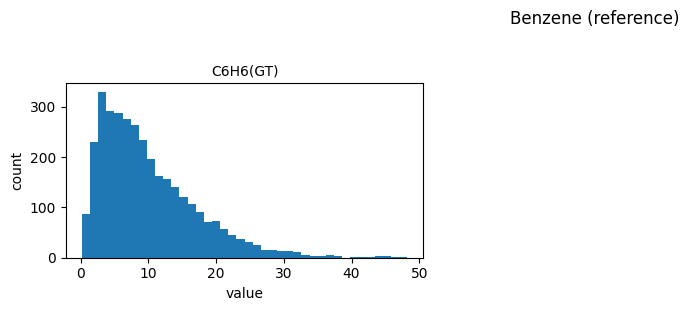

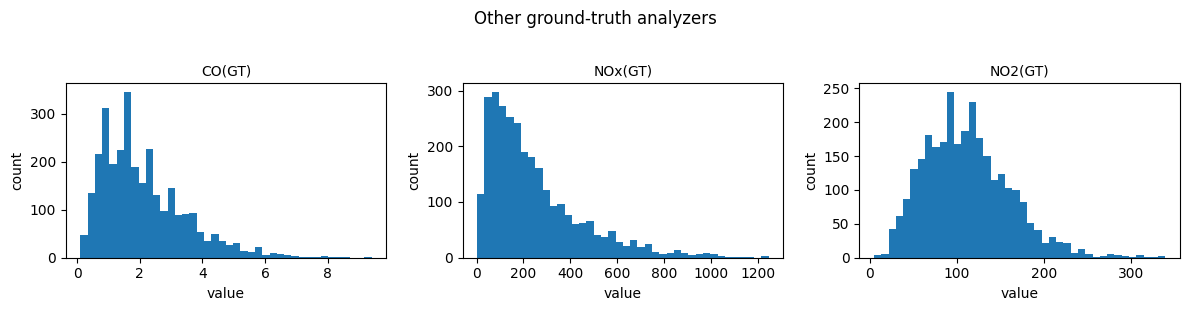

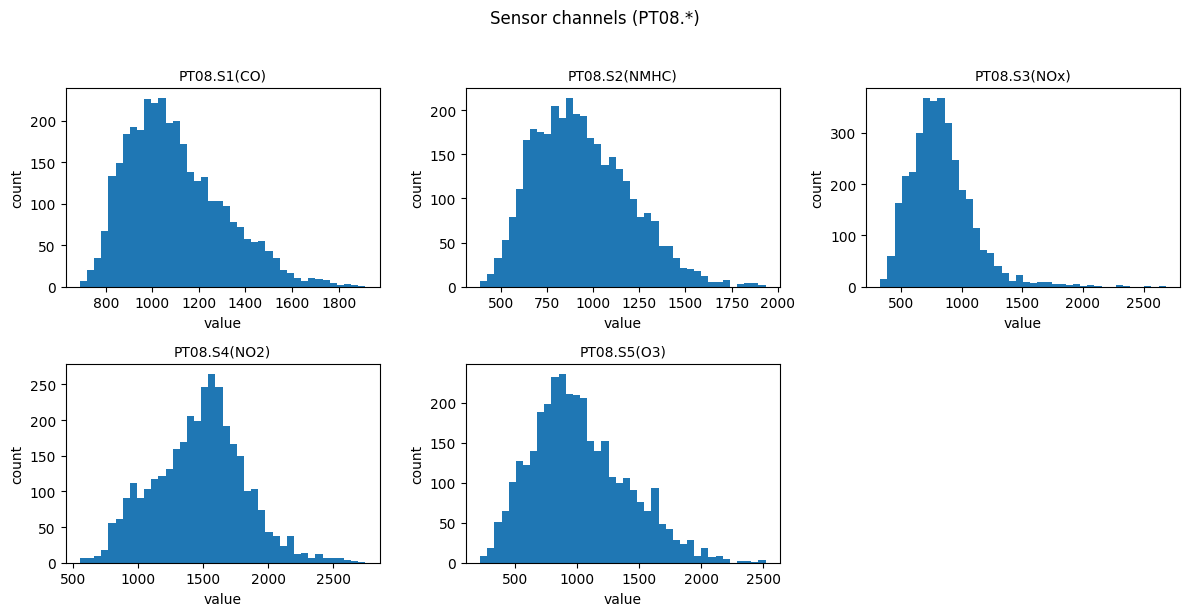

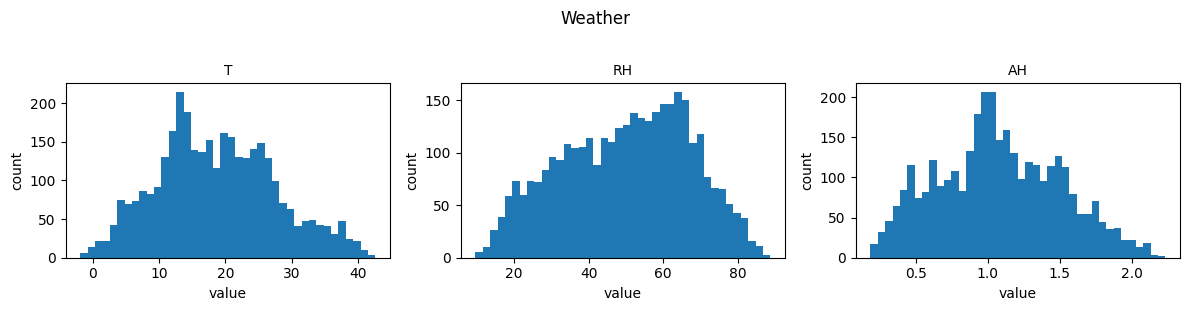

In [ ]:
# Cell 3 — Distributions (simple histograms)

import matplotlib.pyplot as plt
import math
import pandas as pd

# Use rows where a column is present for that column's histogram
cols_benzene = ["C6H6(GT)"]
cols_gt      = [c for c in ["CO(GT)","NOx(GT)","NO2(GT)"] if c in df.columns]
cols_sensors = [c for c in ["PT08.S1(CO)","PT08.S2(NMHC)","PT08.S3(NOx)","PT08.S4(NO2)","PT08.S5(O3)"] if c in df.columns]
cols_weather = [c for c in ["T","RH","AH"] if c in df.columns]

def plot_hist(cols, title):
    if not cols:
        return
    n = len(cols)
    rows = math.ceil(n/3)
    plt.figure(figsize=(12, 3*rows))
    for i, c in enumerate(cols, 1):
        s = df[c].dropna()
        plt.subplot(rows, 3, i)
        plt.hist(s, bins=40)
        plt.title(c, fontsize=10)
        plt.xlabel("value"); plt.ylabel("count")
    plt.suptitle(title, y=1.02, fontsize=12)
    plt.tight_layout()
    plt.show()

plot_hist(cols_benzene, "Benzene (reference)")
plot_hist(cols_gt,      "Other ground-truth analyzers")
plot_hist(cols_sensors, "Sensor channels (PT08.*)")
plot_hist(cols_weather, "Weather")


In [ ]:
# Cell — Tag rows by part of day (using your hour meanings) and summarize

import pandas as pd
import matplotlib.pyplot as plt

# 1) Define dayparts using your hour mapping
dayparts = {
    "Late night (00–05)": list(range(0, 6)),
    "Morning (06–11)":    list(range(6, 12)),
    "Noon (12)":          [12],
    "Afternoon (13–16)":  list(range(13, 17)),
    "Evening (17–20)":    list(range(17, 21)),
    "Night (21–23)":      list(range(21, 24)),
}

# 2) Add a 'daypart' column
def hour_to_daypart(h):
    for label, hours in dayparts.items():
        if h in hours:
            return label
    return "Unknown"

df["daypart"] = df["hour"].map(hour_to_daypart)

# 3) Summaries (medians) for key columns by daypart
cols = [c for c in ["C6H6(GT)","CO(GT)","NOx(GT)","NO2(GT)"] if c in df.columns]
summary_dp = df.groupby("daypart")[cols].median().reindex(list(dayparts.keys()))
summary_dp



,C6H6(GT),CO(GT),NOx(GT),NO2(GT)
daypart,,,,
Late night (00–05),3.883738,0.9,92.00,70.0
Morning (06–11),9.426457,1.9,222.25,107.0
Noon (12),10.570800,2.0,222.50,117.5
Afternoon (13–16),9.916683,2.0,207.85,119.0
Evening (17–20),14.305786,3.1,284.80,139.0
Night (21–23),9.048954,1.9,183.50,111.4


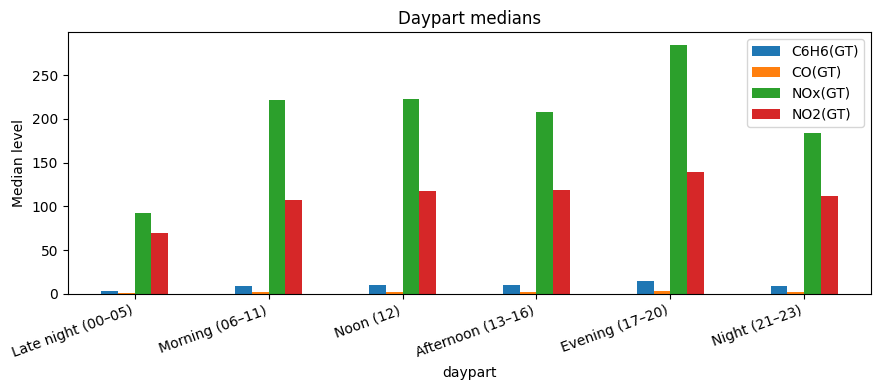

Benzene lowest: Late night (00–05) ≈ 3.88
Benzene highest: Evening (17–20) ≈ 14.31
CO highest: Evening (17–20) ≈ 3.10
NOx highest: Evening (17–20) ≈ 284.80


In [ ]:
# Cell — Daypart bar chart + auto-summary
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

order = ["Late night (00–05)", "Morning (06–11)", "Noon (12)",
         "Afternoon (13–16)", "Evening (17–20)", "Night (21–23)"]

cols = [c for c in ["C6H6(GT)","CO(GT)","NOx(GT)","NO2(GT)"] if c in df.columns]
summary_dp = df.groupby("daypart")[cols].median().reindex(order)

ax = summary_dp.plot(kind="bar", figsize=(9,4))
ax.set_ylabel("Median level"); ax.set_title("Daypart medians")
plt.xticks(rotation=20, ha="right")
plt.tight_layout(); plt.show()

# Print a tiny, readable summary for benzene + CO/NOx
b = summary_dp["C6H6(GT)"]
co = summary_dp["CO(GT)"] if "CO(GT)" in summary_dp else None
nox = summary_dp["NOx(GT)"] if "NOx(GT)" in summary_dp else None

def top_label(s):
    return s.idxmax() if s is not None else None

print("Benzene lowest:", b.idxmin(), f"≈ {b.min():.2f}")
print("Benzene highest:", b.idxmax(), f"≈ {b.max():.2f}")
if co is not None:
    print("CO highest:", co.idxmax(), f"≈ {co.max():.2f}")
if nox is not None:
    print("NOx highest:", nox.idxmax(), f"≈ {nox.max():.2f}")


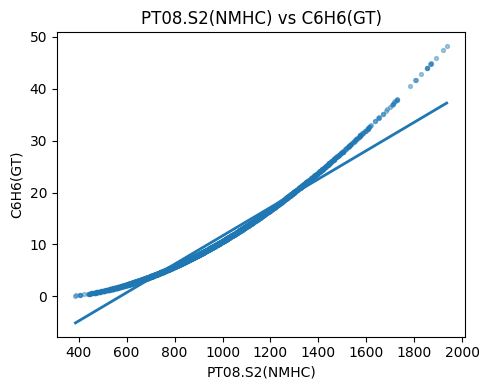

Sensor ↔ Benzene correlations (Pearson r):


,r
PT08.S2(NMHC),0.982990
PT08.S1(CO),0.884856
PT08.S5(O3),0.844183
PT08.S4(NO2),0.749809
PT08.S3(NOx),-0.707947


In [ ]:
# Cell — Sensor ↔ Benzene (scatter + simple correlations)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

target = "C6H6(GT)"
sensors = [c for c in ["PT08.S1(CO)","PT08.S2(NMHC)","PT08.S3(NOx)","PT08.S4(NO2)","PT08.S5(O3)"] if c in df.columns]

# 1) Scatter: PT08.S2 vs Benzene (only rows where both exist)
xcol = "PT08.S2(NMHC)"
pair = df[[xcol, target]].dropna()

plt.figure(figsize=(5,4))
plt.scatter(pair[xcol], pair[target], s=8, alpha=0.4)
# simple least-squares line (no seaborn)
m, b = np.polyfit(pair[xcol], pair[target], 1)
xs = np.linspace(pair[xcol].min(), pair[xcol].max(), 100)
plt.plot(xs, m*xs + b, linewidth=2)
plt.xlabel(xcol); plt.ylabel(target); plt.title(f"{xcol} vs {target}")
plt.tight_layout(); plt.show()

# 2) Correlation of all sensors with benzene (sorted)
corr = df[sensors + [target]].dropna().corr()[target].drop(target).sort_values(ascending=False)
print("Sensor ↔ Benzene correlations (Pearson r):")
display(corr.to_frame("r"))


In [ ]:
# Tiny check: simple regression of benzene on S2 (1 feature)
import numpy as np
from sklearn.linear_model import LinearRegression
pair = df[["PT08.S2(NMHC)", "C6H6(GT)"]].dropna()
X = pair[["PT08.S2(NMHC)"]].values
y = pair["C6H6(GT)"].values
lin = LinearRegression().fit(X, y)
print("Simple regression R² (C6H6 ~ S2):", lin.score(X, y))


Simple regression R² (C6H6 ~ S2): 0.966270034722712


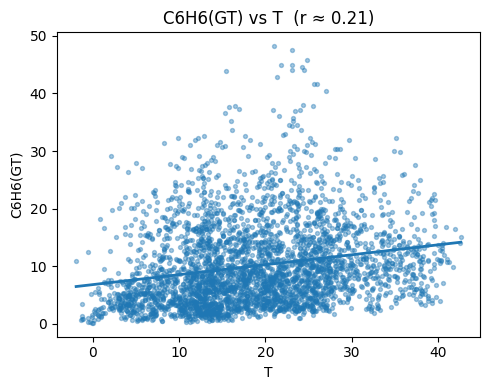

C6H6(GT) vs T: Pearson r ≈ 0.215


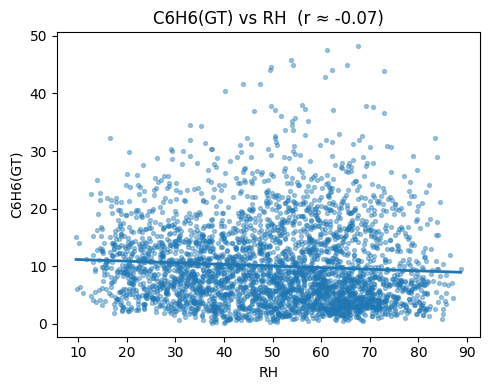

C6H6(GT) vs RH: Pearson r ≈ -0.068


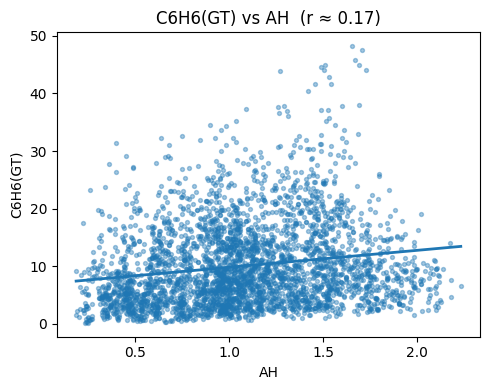

C6H6(GT) vs AH: Pearson r ≈ 0.175


In [ ]:
# Cell — Weather influence on benzene (C6H6 vs T / RH / AH)
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

target = "C6H6(GT)"
weather_cols = [c for c in ["T","RH","AH"] if c in df.columns]

for w in weather_cols:
    pair = df[[w, target]].dropna()
    if len(pair) < 30:
        print(f"Not enough data for {w}.")
        continue

    # Pearson correlation
    r = pair[w].corr(pair[target])

    # Simple least-squares line for the plot
    m, b = np.polyfit(pair[w].values, pair[target].values, 1)
    xs = np.linspace(pair[w].min(), pair[w].max(), 100)

    # Plot
    plt.figure(figsize=(5,4))
    plt.scatter(pair[w], pair[target], s=8, alpha=0.4)
    plt.plot(xs, m*xs + b, linewidth=2)
    plt.xlabel(w); plt.ylabel(target)
    plt.title(f"{target} vs {w}  (r ≈ {r:.2f})")
    plt.tight_layout(); plt.show()

    print(f"{target} vs {w}: Pearson r ≈ {r:.3f}")


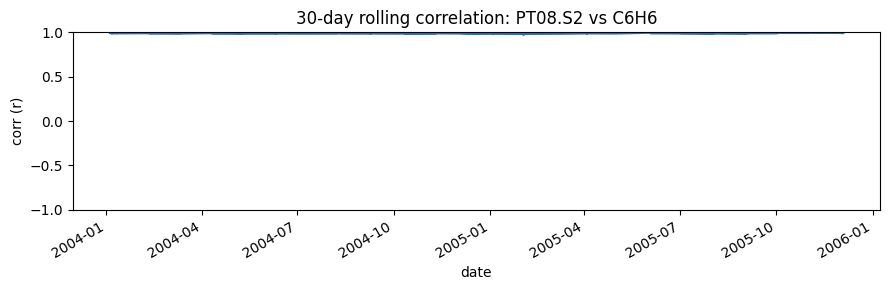

Median rolling r over period: 0.985
Min / Max rolling r: 0.975 / 1.0


In [ ]:
# Cell — Rolling correlation over time (30 days)

import pandas as pd
import matplotlib.pyplot as plt

xcol = "PT08.S2(NMHC)"
ycol = "C6H6(GT)"

pair = df[[xcol, ycol]].dropna().sort_index()

# 30-day time-based rolling window; needs a DatetimeIndex (you have one)
roll = pair[xcol].rolling("30D").corr(pair[ycol])

plt.figure(figsize=(9,3))
roll.plot()
plt.title("30-day rolling correlation: PT08.S2 vs C6H6")
plt.ylabel("corr (r)"); plt.xlabel("date")
plt.ylim(-1, 1)
plt.tight_layout(); plt.show()

print("Median rolling r over period:", round(roll.median(), 3))
print("Min / Max rolling r:", round(roll.min(), 3), "/", round(roll.max(), 3))


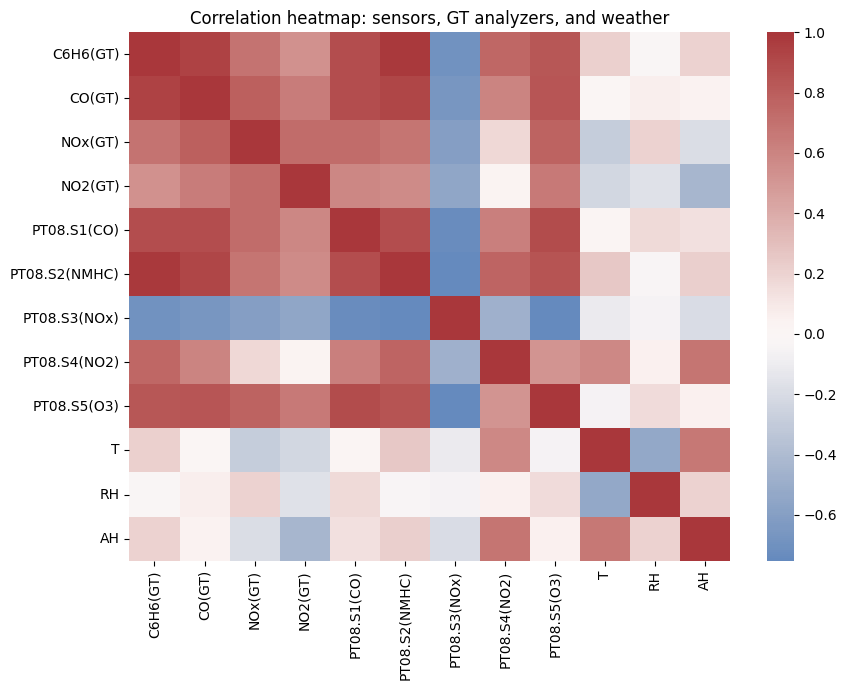

Top correlations with C6H6(GT):


,r
PT08.S2(NMHC),0.983872
CO(GT),0.938568
PT08.S1(CO),0.883256
PT08.S5(O3),0.836274
PT08.S4(NO2),0.750780
NOx(GT),0.690126
NO2(GT),0.534686
T,0.214548


In [ ]:
# Cell — Correlation heatmap of sensors, benzene, traffic gases, weather

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

cols = [c for c in [
    "C6H6(GT)", "CO(GT)", "NOx(GT)", "NO2(GT)",   # ground truth
    "PT08.S1(CO)","PT08.S2(NMHC)","PT08.S3(NOx)","PT08.S4(NO2)","PT08.S5(O3)",  # sensors
    "T","RH","AH"  # weather
] if c in df.columns]

corr = df[cols].dropna().corr()

plt.figure(figsize=(9,7))
sns.heatmap(corr, cmap="vlag", center=0, annot=False)
plt.title("Correlation heatmap: sensors, GT analyzers, and weather")
plt.tight_layout(); plt.show()

# Also print top links with benzene
if "C6H6(GT)" in corr.columns:
    print("Top correlations with C6H6(GT):")
    display(corr["C6H6(GT)"].drop("C6H6(GT)").sort_values(ascending=False).to_frame("r").head(8))


Train  R²: 0.967  MAE: 0.981
Test   R²: 0.958  MAE: 0.967
Slope (per unit S2): 0.0281   Intercept: -16.477


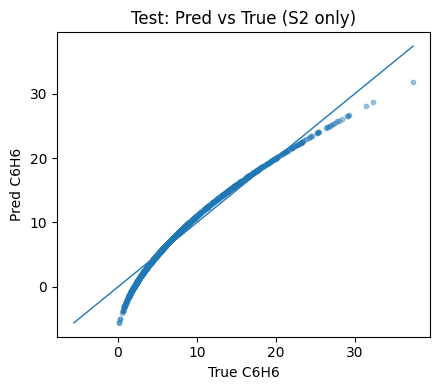

In [ ]:
# Cell A — Minimal calibration: C6H6 ~ PT08.S2 (time-ordered split)

import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error

target = "C6H6(GT)"
xcol   = "PT08.S2(NMHC)"

# Use only rows where both are present, keep time order
data = df[[xcol, target]].dropna().sort_index()
X = data[[xcol]].values
y = data[target].values

# time-ordered split: first 70% train, last 30% test
split = int(len(data)*0.7)
Xtr, Xte = X[:split], X[split:]
ytr, yte = y[:split], y[split:]

# fit and evaluate
lin = LinearRegression().fit(Xtr, ytr)
yhat_tr = lin.predict(Xtr)
yhat_te = lin.predict(Xte)

print("Train  R²:", round(r2_score(ytr, yhat_tr), 3), " MAE:", round(mean_absolute_error(ytr, yhat_tr), 3))
print("Test   R²:", round(r2_score(yte, yhat_te), 3), " MAE:", round(mean_absolute_error(yte, yhat_te), 3))
print("Slope (per unit S2):", round(lin.coef_[0], 4), "  Intercept:", round(lin.intercept_, 3))

# quick visuals
import matplotlib.pyplot as plt
plt.figure(figsize=(4.5,4))
plt.scatter(yte, yhat_te, s=10, alpha=0.4)
lims = [min(yte.min(), yhat_te.min()), max(yte.max(), yhat_te.max())]
plt.plot(lims, lims, lw=1)
plt.xlabel("True C6H6"); plt.ylabel("Pred C6H6"); plt.title("Test: Pred vs True (S2 only)")
plt.tight_layout(); plt.show()


Explained variance: PC1 = 79.3%, PC2 = 11.4%


,PC1_loading,PC2_loading
PT08.S2(NMHC),0.484378,0.110274
PT08.S1(CO),0.474057,-0.108037
PT08.S5(O3),0.461323,-0.322615
PT08.S3(NOx),-0.426660,0.408050
PT08.S4(NO2),0.381826,0.839990


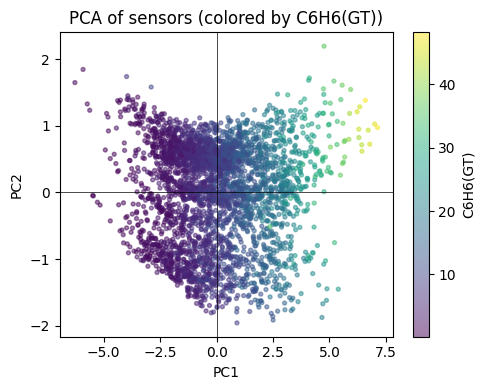

In [ ]:
# Cell U1 — PCA on sensors: variance + loadings + 2D scores
import numpy as np, pandas as pd, matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

sensors = [c for c in ["PT08.S1(CO)","PT08.S2(NMHC)","PT08.S3(NOx)","PT08.S4(NO2)","PT08.S5(O3)"] if c in df.columns]
X = df[sensors].dropna()

# Standardize (PCA needs comparable scales)
Z = StandardScaler().fit_transform(X)

pca = PCA(n_components=2).fit(Z)
scores = pca.transform(Z)   # PC1, PC2 coordinates
ev = pca.explained_variance_ratio_

print(f"Explained variance: PC1 = {ev[0]*100:.1f}%, PC2 = {ev[1]*100:.1f}%")

# Loadings: which sensors define each PC?
loadings = pd.DataFrame(pca.components_.T, index=sensors, columns=["PC1_loading","PC2_loading"])
display(loadings.sort_values("PC1_loading", key=np.abs, ascending=False))

# Plot scores, colored by benzene (if available) else by hour
color_col = "C6H6(GT)" if "C6H6(GT)" in df.columns else "hour"
color_vals = df.loc[X.index, color_col].values

plt.figure(figsize=(5,4))
sc = plt.scatter(scores[:,0], scores[:,1], c=color_vals, s=8, alpha=0.5)
plt.axhline(0, color="k", lw=0.5); plt.axvline(0, color="k", lw=0.5)
plt.xlabel("PC1"); plt.ylabel("PC2"); plt.title("PCA of sensors (colored by " + color_col + ")")
plt.colorbar(sc, label=color_col)
plt.tight_layout(); plt.show()


Data: Number of Days

In [4]:
import pandas as pd

assert isinstance(df.index, pd.DatetimeIndex), "df must have a DatetimeIndex"

# Count rows per calendar day (any column; timestamps only)
day_counts = df.groupby(df.index.date).size().rename("rows_per_day").to_frame()
day_counts["is_full_24h"] = day_counts["rows_per_day"].eq(24)

print("Date range:", df.index.min(), "→", df.index.max())
print("Total unique days in file:", len(day_counts))
print("Days with full 24 hours:", int(day_counts["is_full_24h"].sum()))
print("Days with missing hours:", int((~day_counts["is_full_24h"]).sum()))

# Show first few incomplete days and which hours are missing
incomplete = day_counts[~day_counts["is_full_24h"]].index.tolist()

def missing_hours_for(date_obj):
    day_str = str(date_obj)
    present = set(df.loc[day_str].index.hour.tolist()) if day_str in df.index.strftime("%Y-%m-%d").tolist() else set()
    return sorted(set(range(24)) - present)

if incomplete:
    print("\nExample incomplete days (up to 5 shown):")
    for d in incomplete[:5]:
        print(f"{d}: missing hours {missing_hours_for(d)}")
else:
    print("\nAll listed days have 24 hourly timestamps.")


Date range: 2004-01-04 00:00:00 → 2005-12-03 23:00:00
Total unique days in file: 151
Days with full 24 hours: 149
Days with missing hours: 2

Example incomplete days (up to 5 shown):
2004-10-03: missing hours [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]
2005-04-04: missing hours [15, 16, 17, 18, 19, 20, 21, 22, 23]


The date span is 2004-01-04 to 2005-12-03, which is 700 calendar days total

So the number of days entirely missing from the span is 700 - 151 = 549 days.

No. of days each month

In [9]:
# Fixed: days per month (any data vs benzene-present)
import pandas as pd
import matplotlib.pyplot as plt

assert isinstance(df.index, pd.DatetimeIndex)

# Build a small helper frame
tmp = pd.DataFrame({
    "month": df.index.to_period("M"),
    "date":  df.index.normalize(),
    "has_benz": df["C6H6(GT)"].notna() if "C6H6(GT)" in df.columns else False,
}, index=df.index)

# Unique calendar days with any data in each month
days_any  = tmp.groupby("month")["date"].nunique().rename("days_with_any_data")

# Unique calendar days with at least one benzene reading in the month
days_benz = tmp.loc[tmp["has_benz"]].groupby("month")["date"].nunique() \
               .reindex(days_any.index, fill_value=0).rename("days_with_benzene")

coverage = pd.concat([days_any, days_benz], axis=1).astype(int)
display(coverage)


,days_with_any_data,days_with_benzene
month,,
2004-01,9,9
2004-02,9,9
2004-03,9,9
2004-04,9,9
2004-05,9,9
2004-06,9,9
2004-07,9,9
2004-08,9,9
2004-09,9,9


In [ ]:
# === Add time features (hour/month/season) ===
import numpy as np
import pandas as pd

assert isinstance(df.index, pd.DatetimeIndex), "df must have a DatetimeIndex"

# Core parts
if "hour" not in df.columns:
    df["hour"] = df.index.hour
if "month" not in df.columns:
    df["month"] = df.index.month
if "dayofyear" not in df.columns:
    df["dayofyear"] = df.index.dayofyear

# Cyclic encodings (add only if missing)
for name, num in [("hour", 24), ("month", 12), ("dayofyear", 366)]:
    s = df[name]
    sin_col = f"{name[:3]}_sin" if name=="dayofyear" else f"{name}_sin"
    cos_col = f"{name[:3]}_cos" if name=="dayofyear" else f"{name}_cos"
    if sin_col not in df.columns:
        df[sin_col] = np.sin(2*np.pi*s / num)
    if cos_col not in df.columns:
        df[cos_col] = np.cos(2*np.pi*s / num)

# Seasons (DJF/MAM/JJA/SON) → one-hot
def season_from_month(m):
    if m in (12,1,2):  return "Winter"
    if m in (3,4,5):   return "Spring"
    if m in (6,7,8):   return "Summer"
    return "Autumn"

if "season_Spring" not in df.columns and "season_Summer" not in df.columns:
    seas = df["month"].map(season_from_month)
    seas_dum = pd.get_dummies(seas, prefix="season")
    df[seas_dum.columns] = seas_dum

added = [c for c in ["hour_sin","hour_cos","mon_sin","mon_cos","doy_sin","doy_cos",
                     "season_Autumn","season_Spring","season_Summer","season_Winter"] if c in df.columns]
print("Added/available time features:", added)
df[[c for c in ["hour","month","dayofyear","hour_sin","hour_cos","mon_sin","mon_cos","doy_sin","doy_cos"] if c in df.columns]].head(3)


Added/available time features: ['hour_sin', 'hour_cos', 'season_Autumn', 'season_Spring', 'season_Summer', 'season_Winter']


,hour,month,dayofyear,hour_sin,hour_cos
datetime,,,,,
2004-01-04 00:00:00,0,1,4,0.000000,1.000000
2004-01-04 01:00:00,1,1,4,0.258819,0.965926
2004-01-04 02:00:00,2,1,4,0.500000,0.866025


Seasonal Benzene for 2004

In [10]:
# S1 — Seasonal medians for 2004 (C6H6, CO, NOx, NO2)

import pandas as pd

# restrict to 2004
d04 = df.loc["2004"].copy()

# helper: month -> season (same mapping we used)
def season_from_month(m):
    if m in (12,1,2):  return "Winter"
    if m in (3,4,5):   return "Spring"
    if m in (6,7,8):   return "Summer"
    return "Autumn"

d04["season"] = d04.index.month.map(season_from_month)

cols = [c for c in ["C6H6(GT)","CO(GT)","NOx(GT)","NO2(GT)"] if c in d04.columns]
season_tbl = (d04.groupby("season")[cols]
                .median()
                .reindex(["Winter","Spring","Summer","Autumn"]))
print("Seasonal medians (2004):")
season_tbl


Seasonal medians (2004):


,C6H6(GT),CO(GT),NOx(GT),NO2(GT)
season,,,,
Winter,9.432948,1.9,144.0,93.0
Spring,9.020164,1.8,148.0,93.0
Summer,8.889612,1.8,155.5,95.0
Autumn,8.369357,1.7,149.5,95.0


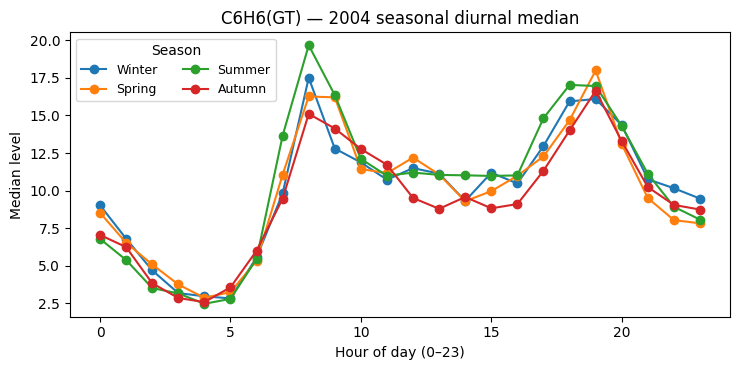

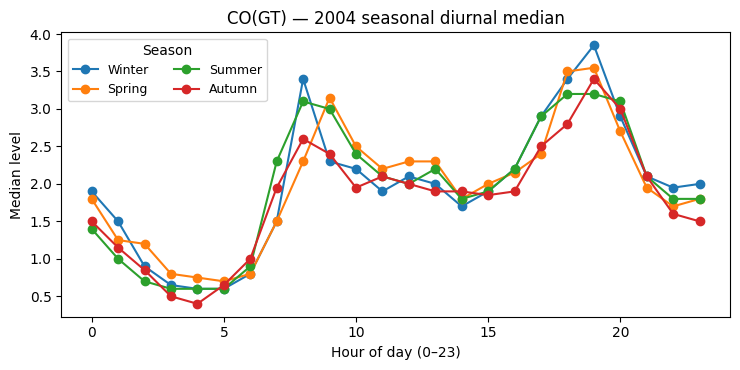

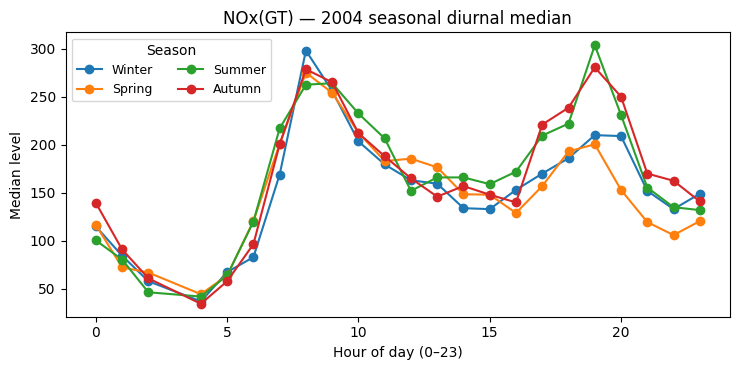

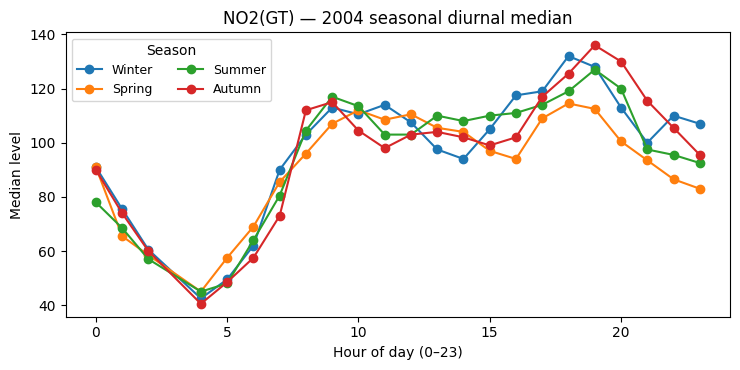

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
season,,,,,,,,,,,,,,,,,,,,,
Winter,9.029995,6.805961,4.700138,3.186102,2.976275,2.832623,5.557897,9.821982,17.508912,12.803383,...,9.317973,11.193572,10.477562,12.972696,15.938558,16.097747,14.360556,10.759506,10.160758,9.472090
Spring,8.530889,6.534919,5.091118,3.759709,2.877078,3.251884,5.338917,11.067802,16.264699,16.207247,...,9.299871,9.969956,10.991242,12.279664,14.681118,17.994017,13.092245,9.507953,8.044167,7.826424
Summer,6.796105,5.390280,3.523504,3.165634,2.475326,2.802926,5.463407,13.659134,19.671981,16.355155,...,11.020787,10.979079,11.016567,14.821648,17.036186,16.960861,14.298011,11.123625,8.927738,8.074611
Autumn,7.055704,6.248122,3.843684,2.861397,2.589178,3.568287,6.004375,9.468788,15.108310,14.135146,...,9.579934,8.826223,9.110163,11.323896,14.003886,16.644390,13.289472,10.238152,9.052235,8.744106


In [11]:
# S2 — Seasonal diurnal curves (hourly medians per season) for 2004

import pandas as pd
import matplotlib.pyplot as plt

# restrict to 2004 and add season label
d04 = df.loc["2004"].copy()

def season_from_month(m):
    if m in (12,1,2):  return "Winter"
    if m in (3,4,5):   return "Spring"
    if m in (6,7,8):   return "Summer"
    return "Autumn"

d04["season"] = d04.index.month.map(season_from_month)
d04["hour"] = d04.index.hour

# choose which pollutants to plot
plot_cols = [c for c in ["C6H6(GT)", "CO(GT)", "NOx(GT)", "NO2(GT)"] if c in d04.columns]

# compute hourly median per season for each pollutant
diurnals = {}
for c in plot_cols:
    diurnals[c] = (
        d04[[c, "season", "hour"]]
        .dropna()
        .groupby(["season","hour"])[c]
        .median()
        .unstack("hour")
        .reindex(["Winter","Spring","Summer","Autumn"])
    )

# plot
for c in plot_cols:
    tbl = diurnals[c]
    plt.figure(figsize=(7.5,3.8))
    for season in tbl.index:
        plt.plot(tbl.columns, tbl.loc[season].values, marker="o", linewidth=1.5, label=season)
    plt.title(f"{c} — 2004 seasonal diurnal median")
    plt.xlabel("Hour of day (0–23)")
    plt.ylabel("Median level")
    plt.legend(title="Season", ncol=2, fontsize=9)
    plt.tight_layout()
    plt.show()

# show one table for reference (benzene if available, else first column)
if "C6H6(GT)" in diurnals:
    display(diurnals["C6H6(GT)"])
elif plot_cols:
    display(diurnals[plot_cols[0]])


In [28]:
# Steps 1→5 (2004 only) — C6H6 modeling with S2
import numpy as np, pandas as pd
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score, mean_absolute_error

assert "PT08.S2(NMHC)" in df.columns and "C6H6(GT)" in df.columns
s2, ycol = "PT08.S2(NMHC)", "C6H6(GT)"

# ---- helper: season mapping
def season_from_month(m):
    return ("Winter" if m in (12,1,2) else
            "Spring" if m in (3,4,5) else
            "Summer" if m in (6,7,8) else
            "Autumn")

# ---- build 2004 working frame + lags/weather/season (only what we need)
w = df.loc["2004", [c for c in [s2, "T", "RH", ycol] if c in df.columns]].copy()
for L in (1,3,6):
    w[f"{s2}_lag{L}"] = w[s2].shift(L)
w["S2_sq"] = w[s2]**2  # used in Step 4 only
w["season"] = w.index.month.map(season_from_month)
S = pd.get_dummies(w["season"], prefix="season")
w = pd.concat([w.drop(columns=["season"]), S], axis=1)

# ---- generic evaluator (time-ordered split)
def eval_feats(frame, features, label, model="linear"):
    data = frame[features + [ycol]].dropna().sort_index()
    X, y = data[features].values, data[ycol].values
    split = int(len(data)*0.7)
    Xtr, Xte, ytr, yte = X[:split], X[split:], y[:split], y[split:]
    est = LinearRegression() if model=="linear" else Ridge(alpha=1.0, random_state=0)
    pipe = make_pipeline(StandardScaler(), est)
    pipe.fit(Xtr, ytr)
    yhat_tr, yhat_te = pipe.predict(Xtr), pipe.predict(Xte)
    print(f"{label:35s} | n={len(data):4d} | R²(tr)={r2_score(ytr,yhat_tr):.3f} "
          f"| R²(te)={r2_score(yte,yhat_te):.3f} | MAE(te)={mean_absolute_error(yte,yhat_te):.3f}")
    return

# ---------------------
# STEP 1: S2 only (linear)
feat1 = [s2]
eval_feats(w, feat1, "Step 1: S2 only (linear)", model="linear")

# STEP 2: S2 + lags (Ridge, collinearity-safe)
feat2 = [s2, f"{s2}_lag1", f"{s2}_lag3", f"{s2}_lag6"]
eval_feats(w, feat2, "Step 2: S2 + lags (1,3,6h) (Ridge)", model="ridge")

# STEP 3: S2 + lags + T,RH (Ridge)
feat3 = feat2 + [c for c in ["T","RH"] if c in w.columns]
eval_feats(w, feat3, "Step 3: + T, RH (Ridge)", model="ridge")

# STEP 4: add mild nonlinearity S2^2 (Ridge)
feat4 = feat3 + ["S2_sq"]
eval_feats(w, feat4, "Step 4: + S2^2 (Ridge)", model="ridge")

# STEP 5: LINEAR with season dummies (NO quadratic)
season_cols = [c for c in ["season_Winter","season_Spring","season_Summer","season_Autumn"] if c in w.columns]
feat5 = feat3 + season_cols  # no S2_sq here, per your request
eval_feats(w, feat5, "Step 5: + season dummies (Linear)", model="linear")


Step 1: S2 only (linear)            | n=2596 | R²(tr)=0.968 | R²(te)=0.959 | MAE(te)=0.992
Step 2: S2 + lags (1,3,6h) (Ridge)  | n=2556 | R²(tr)=0.969 | R²(te)=0.961 | MAE(te)=0.983
Step 3: + T, RH (Ridge)             | n=2556 | R²(tr)=0.970 | R²(te)=0.962 | MAE(te)=0.968
Step 4: + S2^2 (Ridge)              | n=2556 | R²(tr)=1.000 | R²(te)=1.000 | MAE(te)=0.060
Step 5: + season dummies (Linear)   | n=2556 | R²(tr)=0.970 | R²(te)=0.962 | MAE(te)=0.951


In [12]:
#Season-wise modeling (2004): C6H6 ~ S2 + (lag1, lag3, lag6) + T + RH

import numpy as np, pandas as pd
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score, mean_absolute_error

# 1) Build lags once
work = df.copy()
for L in (1,3,6):
    work[f"PT08.S2(NMHC)_lag{L}"] = work["PT08.S2(NMHC)"].shift(L)

# 2) Restrict to 2004 and add season labels
d04 = work.loc["2004"].copy()

def season_from_month(m):
    if m in (12,1,2):  return "Winter"
    if m in (3,4,5):   return "Spring"
    if m in (6,7,8):   return "Summer"
    return "Autumn"

d04["season"] = d04.index.month.map(season_from_month)

features = ["PT08.S2(NMHC)","T","RH",
            "PT08.S2(NMHC)_lag1","PT08.S2(NMHC)_lag3","PT08.S2(NMHC)_lag6"]
target = "C6H6(GT)"

def fit_split(frame):
    data = frame[features + [target]].dropna().sort_index()
    if len(data) < 300:
        return {"n": len(data), "R2_train": np.nan, "R2_test": np.nan, "MAE_test": np.nan}
    split = int(len(data)*0.7)
    Xtr, Xte = data[features].values[:split], data[features].values[split:]
    ytr, yte = data[target].values[:split], data[target].values[split:]
    pipe = make_pipeline(StandardScaler(), Ridge(alpha=1.0, random_state=0))
    pipe.fit(Xtr, ytr)
    yhat_tr, yhat_te = pipe.predict(Xtr), pipe.predict(Xte)
    return {
        "n": len(data),
        "R2_train": r2_score(ytr, yhat_tr),
        "R2_test":  r2_score(yte, yhat_te),
        "MAE_test": mean_absolute_error(yte, yhat_te),
    }

seasons = ["Winter","Spring","Summer","Autumn"]
rows = []
for s in seasons:
    res = fit_split(d04[d04["season"]==s])
    res["season"] = s
    rows.append(res)

season_perf = pd.DataFrame(rows).set_index("season")[["n","R2_train","R2_test","MAE_test"]]
print("Season-wise performance (2004):")
season_perf


Season-wise performance (2004):


,n,R2_train,R2_test,MAE_test
season,,,,
Winter,653,0.968153,0.955127,0.957161
Spring,648,0.970448,0.965058,1.148505
Summer,616,0.971290,0.973129,0.918036
Autumn,639,0.970703,0.974964,0.795390


Linear only (2004→2005):      R²=0.957  MAE=0.980   (C6H6 ≈ -16.413873 + 0.028070·S2)
Linear + AR(1) residuals:     R²=0.957  MAE=0.980   (phi≈0.678)


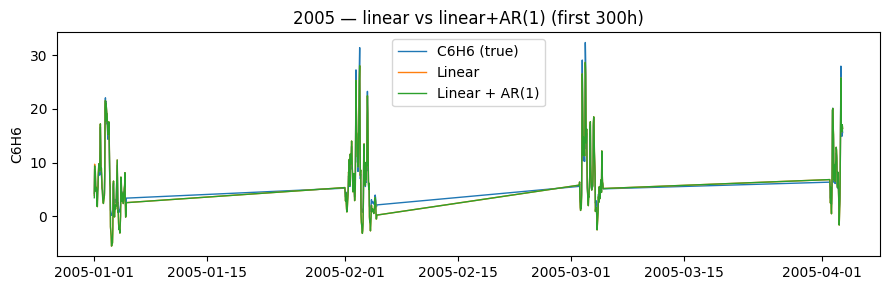

In [39]:
# Linear + AR(1) on residuals — train 2004 → test 2005
import numpy as np, pandas as pd, matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
from statsmodels.tsa.statespace.sarimax import SARIMAX

s2, ycol = "PT08.S2(NMHC)", "C6H6(GT)"

# 1) Split
train = df.loc["2004", [s2, ycol]].dropna().sort_index()
test  = df.loc["2005", [s2, ycol]].dropna().sort_index()
if len(train) == 0 or len(test) == 0:
    raise ValueError(f"Empty slice — train rows: {len(train)}, test rows: {len(test)}.")

# 2) Fit LINEAR on 2004, predict 2005  (C6H6 ≈ a + b*S2)
Xtr = np.column_stack([np.ones(len(train)), train[s2].values])   # [1, S2]
ytr = train[ycol].values
lin = LinearRegression(fit_intercept=False).fit(Xtr, ytr)
a, b = lin.coef_

Xte = np.column_stack([np.ones(len(test)), test[s2].values])
yte = test[ycol].values
yhat_lin = Xte @ lin.coef_

# 3) AR(1) on 2004 residuals → forecast residuals for 2005
res_tr = ytr - (Xtr @ lin.coef_)
ar_res = SARIMAX(res_tr, order=(1,0,0), trend="n",
                 enforce_stationarity=True, enforce_invertibility=True).fit(disp=False)
res_fc = np.asarray(ar_res.get_forecast(steps=len(test)).predicted_mean).ravel()
yhat_lin_ar1 = yhat_lin + res_fc

# 4) Metrics
names = ar_res.model.param_names
phi = float(ar_res.params[names.index("ar.L1")]) if "ar.L1" in names else np.nan

mae_lin = mean_absolute_error(yte, yhat_lin)
r2_lin  = r2_score(yte, yhat_lin)
mae_ar  = mean_absolute_error(yte, yhat_lin_ar1)
r2_ar   = r2_score(yte, yhat_lin_ar1)

print(f"Linear only (2004→2005):      R²={r2_lin:.3f}  MAE={mae_lin:.3f}   (C6H6 ≈ {a:.6f} + {b:.6f}·S2)")
print(f"Linear + AR(1) residuals:     R²={r2_ar:.3f}  MAE={mae_ar:.3f}   (phi≈{phi:.3f})")

# 5) Visual: first 300 hours of 2005
seg = slice(0, min(300, len(test)))
tidx = test.index[seg]
plt.figure(figsize=(9,3))
plt.plot(tidx, yte[seg], label="C6H6 (true)", lw=1)
plt.plot(tidx, yhat_lin[seg], label="Linear", lw=1)
plt.plot(tidx, yhat_lin_ar1[seg], label="Linear + AR(1)", lw=1)
plt.title("2005 — linear vs linear+AR(1) (first 300h)")
plt.ylabel("C6H6"); plt.legend(); plt.tight_layout(); plt.show()
